In [130]:
import pandas as pd
df = pd.read_csv(r'.\Bets_huge\clean_bets_huge_low.csv')

In [131]:
from scipy.ndimage import gaussian_filter1d
import numpy as np


smoothed_data = pd.DataFrame(gaussian_filter1d(df["0"], sigma=1))
smoothed_data[0] = smoothed_data[0].apply(lambda x: round(x, 1))

In [132]:
def show_stats(data):
    print("Max: ", data.max(), " Min: ", data.min(), " Std: ", data.std())
    print("Mean: ", data.mean(), " Median: ", data.median())

In [133]:
from fitter import Fitter, get_common_distributions

distributions_set = get_common_distributions()

In [134]:
show_stats(smoothed_data[0])

Max:  9.7  Min:  0.1  Std:  0.7571933103836205
Mean:  0.7469956507245403  Median:  0.5


2024-05-05 01:02:17.684 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=5.009835)
2024-05-05 01:02:17.746 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=3.059707)
2024-05-05 01:02:18.005 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=9.53768)
2024-05-05 01:02:18.367 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=4.062055)
2024-05-05 01:02:19.479 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.882172)
2024-05-05 01:02:21.151 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=1.029511)
2024-05-05 01:02:21.966 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=7.087947)
2024-05-05 01:02:27.968 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted

{'lognorm': {'s': 0.917354268117348, 'loc': 0.08217853567482813, 'scale': 0.42800674175117154}}


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.882172,1073.113986,1107.216763,inf,0.097529,0.0
cauchy,1.029511,1030.969886,1053.705071,inf,0.223372,0.0
gamma,2.173784,1575.771820,1609.874598,inf,0.142570,0.0
expon,3.059707,1400.698085,1423.433270,inf,0.137471,0.0
rayleigh,4.062055,3844.399235,3867.134420,inf,0.260760,0.0


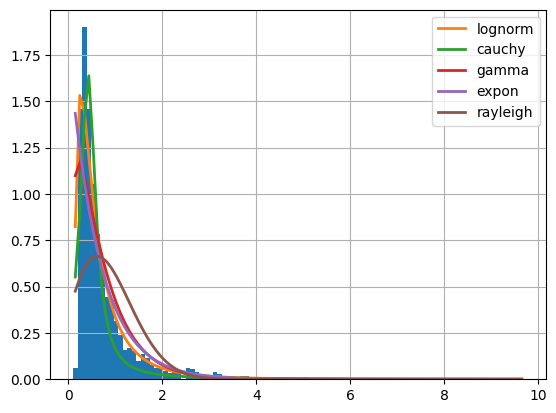

In [135]:
f = Fitter(smoothed_data[0], distributions = distributions_set)
f.fit()
print(f.get_best())
f.summary()

In [136]:
smoothed_data.to_csv('smooth_bets_huge_low.csv', index=False) #export to csv

In [137]:
df = pd.read_csv(r'.\Bets_huge\clean_bets_huge.csv')
df = df.loc[~(df<=smoothed_data[0].max()).all(axis=1)]
df = df.reset_index(drop=True)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15554 entries, 0 to 15553
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   action_amount  15554 non-null  float64
dtypes: float64(1)
memory usage: 121.6 KB


In [139]:
from sklearn.cluster import KMeans

data = df["action_amount"].copy()
kmeans = KMeans(n_clusters=2, n_init="auto", algorithm="elkan", random_state = 0).fit(data.values.reshape(-1, 1))
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[20.12810187]
 [60.74606186]]
[1 0 0 ... 0 0 0]


In [140]:
df2 = []
i = 0
for x in kmeans.labels_:
    if x == 0:
        df2.append(data.loc[i])
    i += 1

df2 = pd.DataFrame(df2)

Max:  40.2  Min:  9.72  Std:  7.635566574634029
Mean:  20.128101866497943  Median:  18.0


2024-05-05 01:02:48.740 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.939591)
2024-05-05 01:02:48.765 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.914947)
2024-05-05 01:02:48.800 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.941507)
2024-05-05 01:02:48.878 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.930477)
2024-05-05 01:02:48.920 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.914089)
2024-05-05 01:02:49.008 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.940267)
2024-05-05 01:02:49.032 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.929486)
2024-05-05 01:02:49.219 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitte

{'gamma': {'a': 1.446861750942547, 'loc': 9.690709613289965, 'scale': 7.2138161203651565}}


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.909300,759.983337,782.318151,inf,0.121556,2.859180e-163
chi2,0.909301,759.983631,782.318445,inf,0.121558,2.834058e-163
exponpow,0.912607,744.737621,767.072435,inf,0.131477,4.842552e-191
lognorm,0.914089,773.901079,796.235894,inf,0.126043,1.482544e-175
expon,0.914947,765.365692,780.255568,inf,0.119536,6.933329e-158


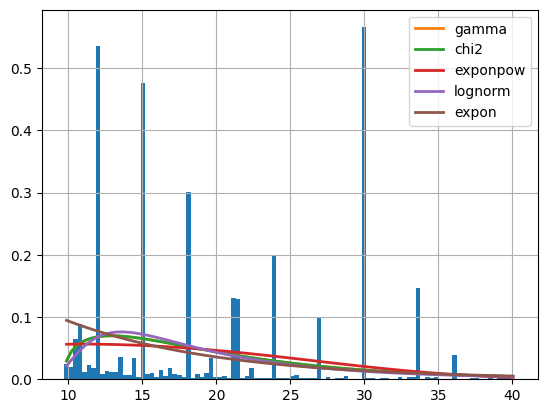

In [141]:
show_stats(df2[0])
f = Fitter(df2[0], distributions = distributions_set)
f.fit()
print(f.get_best())
f.summary()

In [142]:
smoothed_data = pd.DataFrame(gaussian_filter1d(df2[0], sigma=1))
smoothed_data[0] = smoothed_data[0].apply(lambda x: round(x, 1))

In [143]:
show_stats(smoothed_data[0])

Max:  34.9  Min:  10.9  Std:  4.0669176216887255
Mean:  20.128037013603294  Median:  19.9


2024-05-05 01:02:49.758 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.156477)
2024-05-05 01:02:49.798 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.017424)
2024-05-05 01:02:49.837 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.122393)
2024-05-05 01:02:49.942 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.02097)
2024-05-05 01:02:49.970 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.015844)
2024-05-05 01:02:50.032 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.041926)
2024-05-05 01:02:50.062 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.122065)
2024-05-05 01:02:50.338 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted

{'chi2': {'df': 36.90567010374646, 'loc': 2.5275307391037067, 'scale': 0.4769051946322739}}


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,0.015687,770.685850,793.020664,inf,0.023591,1.519169e-06
gamma,0.015687,770.685793,793.020607,inf,0.023591,1.519278e-06
lognorm,0.015844,772.609925,794.944739,inf,0.022159,7.968129e-06
exponpow,0.016552,884.967729,907.302543,inf,0.035841,1.510639e-14
norm,0.017424,805.019461,819.909337,inf,0.037143,1.361747e-15


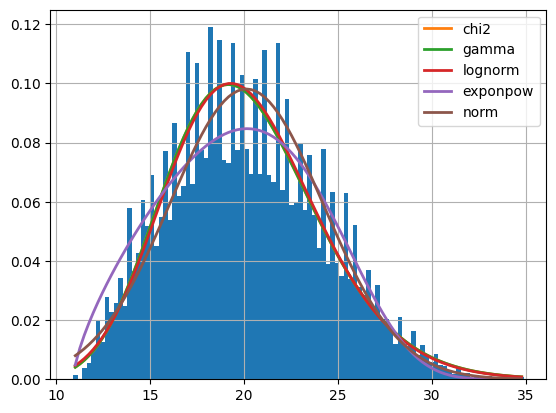

In [144]:
f = Fitter(smoothed_data[0], distributions = distributions_set)
f.fit()
print(f.get_best())
f.summary()

In [145]:
smoothed_data.to_csv('smooth_bets_huge_med.csv', index=False) #export to csv

In [146]:
df = pd.read_csv(r'.\Bets_huge\clean_bets_huge.csv')
df = df.loc[~(df<=smoothed_data[0].max()).all(axis=1)]
df = df.reset_index(drop=True)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3133 entries, 0 to 3132
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   action_amount  3133 non-null   float64
dtypes: float64(1)
memory usage: 24.6 KB


2024-05-05 01:02:51.181 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.337785)
2024-05-05 01:02:51.186 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.338902)
2024-05-05 01:02:51.208 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.340525)
2024-05-05 01:02:51.235 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.335726)
2024-05-05 01:02:51.284 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.334785)


Max:  99.0  Min:  35.1  Std:  16.393899999777677
Mean:  59.03082668368975  Median:  60.0


2024-05-05 01:02:51.370 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.338933)
2024-05-05 01:02:51.388 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.337746)
2024-05-05 01:02:51.458 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.334686)
2024-05-05 01:02:51.502 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.334686)
2024-05-05 01:02:51.584 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.391116)


{'gamma': {'a': 2.0914379333769153, 'loc': 33.674446993168544, 'scale': 12.123903141205469}}


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.334686,895.852215,914.001454,inf,0.175121,1.669371e-84
chi2,0.334686,895.851912,914.001150,inf,0.175120,1.674127e-84
lognorm,0.334785,902.753323,920.902561,inf,0.177811,4.001787e-87
rayleigh,0.335726,888.333584,900.433077,inf,0.169140,7.992059e-79
cauchy,0.337746,959.900005,971.999498,inf,0.190158,1.106426e-99


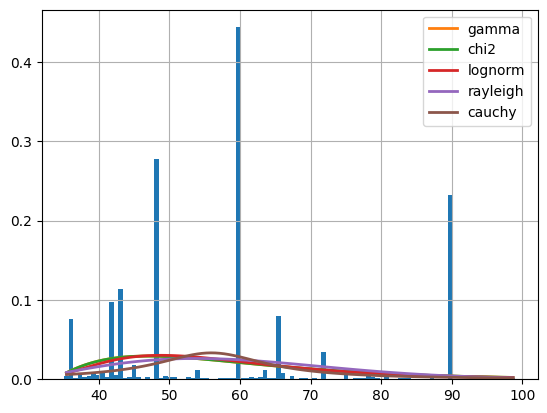

In [148]:
show_stats(df["action_amount"])
f = Fitter(df["action_amount"], distributions = distributions_set)
f.fit()
print(f.get_best())
f.summary()

In [149]:
smoothed_data = pd.DataFrame(gaussian_filter1d(df["action_amount"], sigma=1))
smoothed_data[0] = smoothed_data[0].apply(lambda x: round(x, 1))

In [150]:
show_stats(smoothed_data[0])

Max:  89.7  Min:  38.8  Std:  10.0016621713534
Mean:  59.03121608681774  Median:  58.4


2024-05-05 01:02:52.021 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0091)
2024-05-05 01:02:52.029 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.029958)
2024-05-05 01:02:52.051 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.023141)
2024-05-05 01:02:52.077 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.007323)
2024-05-05 01:02:52.129 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.008417)
2024-05-05 01:02:52.209 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.023081)
2024-05-05 01:02:52.229 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.01496)
2024-05-05 01:02:52.363 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted g

{'rayleigh': {'loc': 38.76196964281458, 'scale': 15.981922110572652}}


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
rayleigh,0.007323,863.820830,875.920322,inf,0.042555,2.285760e-05
gamma,0.008119,874.343304,892.492543,inf,0.046047,3.276498e-06
chi2,0.008119,874.343302,892.492541,inf,0.046046,3.277357e-06
lognorm,0.008417,875.641272,893.790511,inf,0.050824,1.792163e-07
norm,0.009100,891.417789,903.517281,inf,0.062389,4.809581e-11


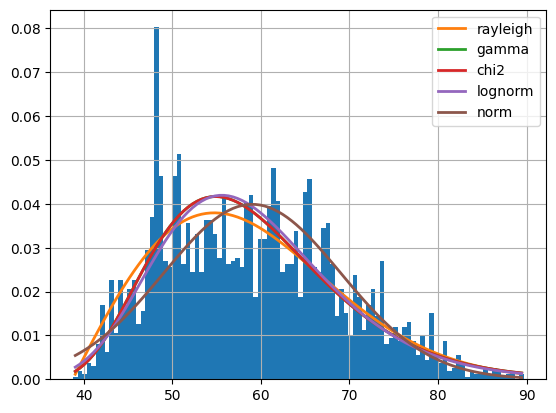

In [151]:
f = Fitter(smoothed_data[0], distributions = distributions_set)
f.fit()
print(f.get_best())
f.summary()

In [152]:
smoothed_data.to_csv('smooth_bets_huge_high.csv', index=False) #export to csv

In [153]:
df1 = pd.read_csv(r'.\Bets_huge\smooth_bets_huge_low.csv')
df1.value_counts(sort=False).to_csv('smooth_bets_huge_freq_low.csv')
df1 = pd.read_csv(r'.\Bets_huge\smooth_bets_huge_med.csv')
df1.value_counts(sort=False).to_csv('smooth_bets_huge_freq_med.csv')
df1 = pd.read_csv(r'.\Bets_huge\smooth_bets_huge_high.csv')
df1.value_counts(sort=False).to_csv('smooth_bets_huge_freq_high.csv')